In [19]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
import seaborn as sns
from mlxtend.plotting import plot_decision_regions

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dropout

In [12]:
X, y = make_moons(100, noise=0.25, random_state=2)

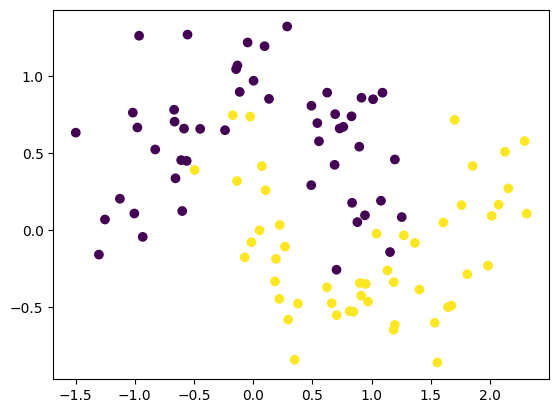

In [13]:
import matplotlib.pyplot as plt
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.show()

In [14]:
model1 = Sequential()

model1.add(Dense(128, input_dim=2, activation='relu'))
model1.add(Dense(128, activation='relu'))
model1.add(Dense(1, activation='sigmoid'))

model1.summary()

c:\Users\ishaa\OneDrive\Desktop\ml-prfl\Deep-Learning-from-scratch\venv\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │           384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,025 (66.50 KB)

 Trainable params: 17,025 (66.50 KB)

 Non-trainable params: 0 (0.00 B)

In [15]:
adam = Adam(learning_rate=0.01)
model1.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])
history1 = model1.fit(X, y, epochs=2000, validation_split=0.2, verbose=0)

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 5s 540us/step


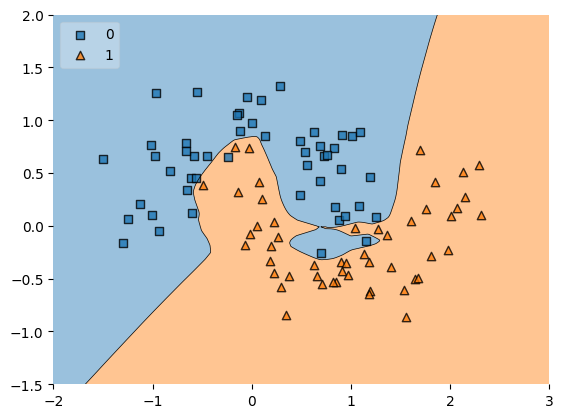

In [16]:
plot_decision_regions(X, y.astype('int'), clf=model1, legend=2)
plt.xlim(-2, 3)
plt.ylim(-1.5, 2)
plt.show()

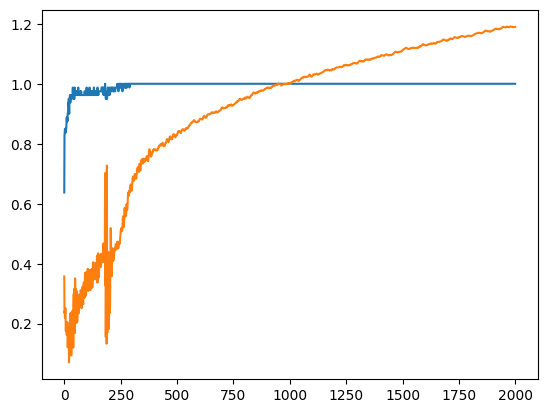

In [17]:
plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_loss'])

In [21]:
model2 = Sequential()

model2.add(Dense(128, input_dim=2, activation='relu', kernel_regularizer=tf.keras.regularizers.l1(0.001)))
model2.add(Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l1(0.001)))
model2.add(Dense(1, activation='sigmoid'))

model2.summary()

c:\Users\ishaa\OneDrive\Desktop\ml-prfl\Deep-Learning-from-scratch\venv\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 128)            │           384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,025 (66.50 KB)

 Trainable params: 17,025 (66.50 KB)

 Non-trainable params: 0 (0.00 B)

In [22]:
adam = Adam(learning_rate=0.01)
model2.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])

history2 = model2.fit(X, y, epochs=2000, validation_split = 0.2,verbose=0)

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 5s 558us/step


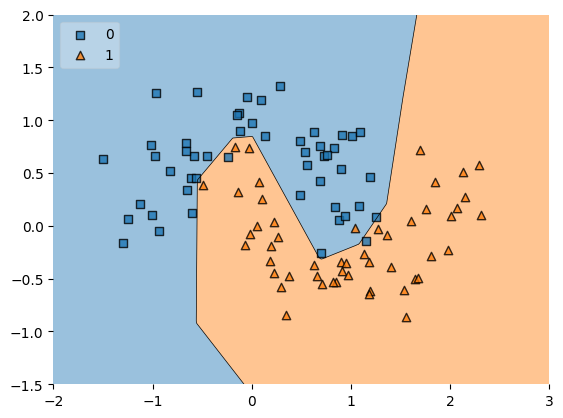

In [23]:
plot_decision_regions(X, y.astype('int'), clf=model2, legend=2)
plt.xlim(-2,3)
plt.ylim(-1.5,2)
plt.show()

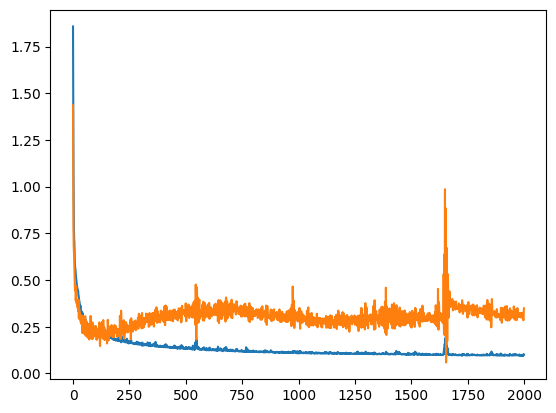

In [24]:
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])

In [25]:
model1_weight_layer1 = model1.get_weights()[0].reshape(256)
model2_weight_layer1 = model2.get_weights()[0].reshape(256)

<Axes: >

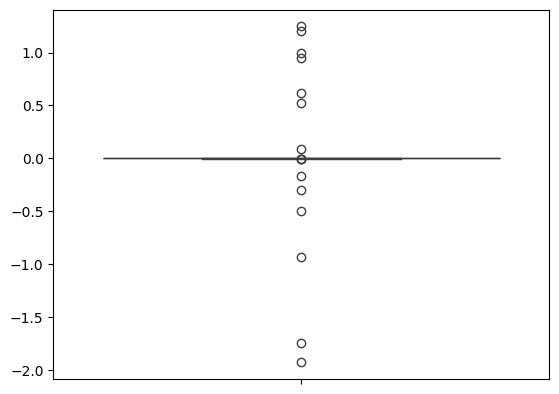

In [26]:
sns.boxplot(model2_weight_layer1)

In [27]:
model1_weight_layer1.min()

np.float32(-3.0856545)

In [28]:
model2_weight_layer1.min()

np.float32(-1.9291388)

C:\Users\ishaa\AppData\Local\Temp\ipykernel_2604\2224180084.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(model1_weight_layer1)
C:\Users\ishaa\AppData\Local\Temp\ipykernel_2604\2224180084.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(model2_weight_layer1)


<Axes: ylabel='Density'>

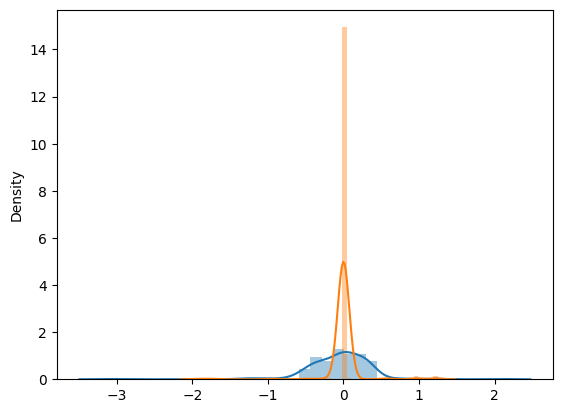

In [29]:
sns.distplot(model1_weight_layer1)
sns.distplot(model2_weight_layer1)

In [30]:
model1.get_weights()[0].reshape(256)

array([ 3.83569062e-01,  1.57716274e-01,  3.70571196e-01, -2.33655408e-01,
       -1.98318884e-01, -3.42623144e-01,  9.67581794e-02,  3.78984898e-01,
       -4.72142905e-01, -8.84753764e-02, -5.66300377e-02, -2.34198719e-01,
        3.04669663e-02,  2.76492089e-01,  3.26956570e-01, -4.98065591e-01,
       -2.79695243e-01, -1.73512921e-01,  3.26468945e-01, -5.20996153e-01,
       -3.70566964e-01,  7.16592222e-02, -4.29457933e-01, -3.78191561e-01,
       -3.12435269e-01, -3.08597118e-01, -2.98053294e-01,  2.92408943e-01,
        3.10534388e-01, -3.77307273e-02,  3.15713435e-01,  3.58873338e-01,
       -1.10675491e-01,  3.21705230e-02, -1.68671235e-01, -2.83167124e-01,
        3.01907718e-01, -4.29240465e-01,  2.10325852e-01, -5.78664280e-02,
        1.80386946e-01, -3.91299874e-01, -4.41015899e-01,  9.84277278e-02,
       -1.07537411e-01,  7.10521713e-02,  3.62042993e-01, -1.22322906e-02,
       -3.64322752e-01,  3.11427206e-01,  3.71838480e-01,  8.80774483e-02,
        3.70989144e-01,  